<h1>Logistic Regression (Classification)</h1>

So far we investigated the regression problem in which the output ($y$) was a continuous number. However, there is another types of problem in machine learning called **Classification** in which the output of the model is a discrete number (label)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
np.random.seed(24)
x = np.random.randint(30, high=150, size=100, dtype=int)
y = 1 * x ** 2 + 5 * x + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([x, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "price"])
dataset_df.head(7)

,area,price
0,64,4373
1,33,371
2,94,9914
3,117,14150
4,47,2271
5,47,3362
6,31,236


Text(0, 0.5, 'Price ($)')

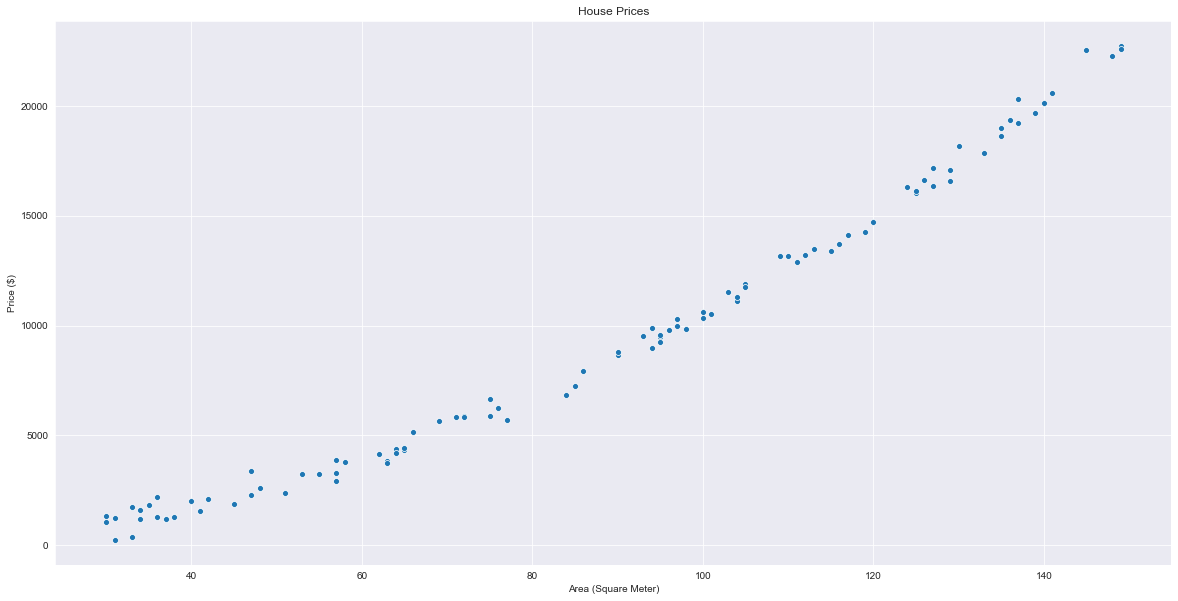

In [3]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")

In [16]:
x_class = np.random.randint(30, high=150, size=100, dtype=int)
y_class = np.zeros_like(x_class)
y_class[x_class < 60] = 1
y_class[(x_class > 60) & (x_class < 100)] = 0
y_class[x_class > 100] = 2
noise = np.zeros_like(x_class)
noise[np.random.uniform(size=x_class.shape[0])>0.8] = 1
y_class_noisy = y_class
y_class_noisy[noise==1] = np.random.randint(low=0, high=3,size=y_class_noisy[noise==1].shape[0])

dataset_class = np.array([x_class, y_class_noisy]).T
dataset_class_df = pd.DataFrame(dataset_class, columns=["feature", "label"])
dataset_class_df.head(7)

,feature,label
0,63,0
1,87,0
2,54,1
3,126,2
4,69,0
5,91,0
6,86,0


Text(0, 0.5, 'label')

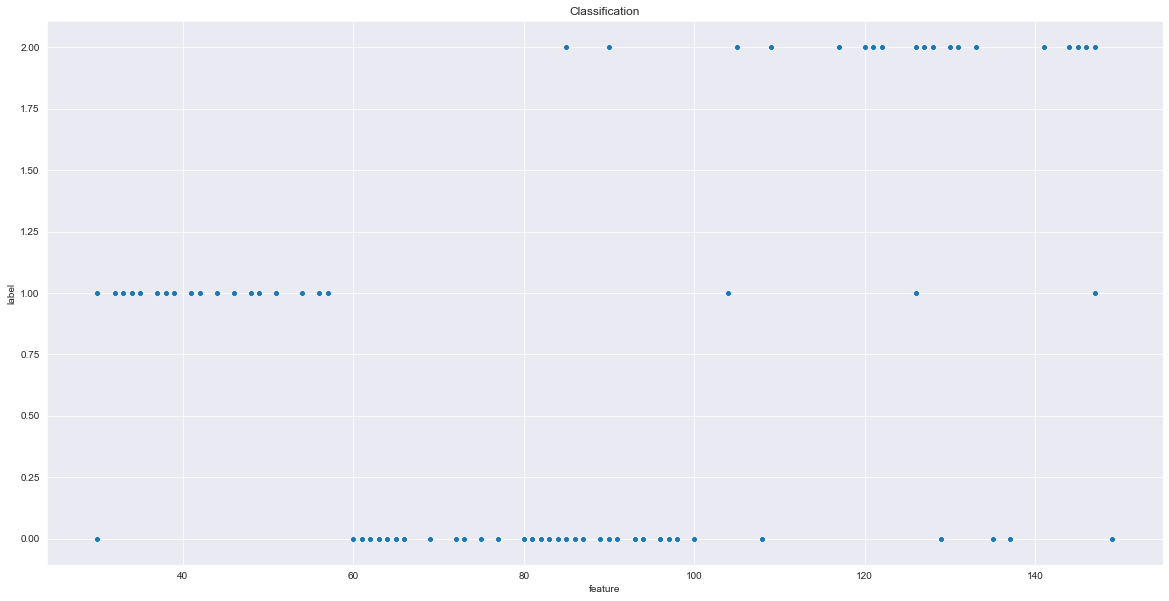

In [19]:
plt.figure(figsize=(20,10))
plt.title("Classification")
sns.scatterplot(data=dataset_class_df,x="feature", y="label")
plt.xlabel("feature")
plt.ylabel("label")

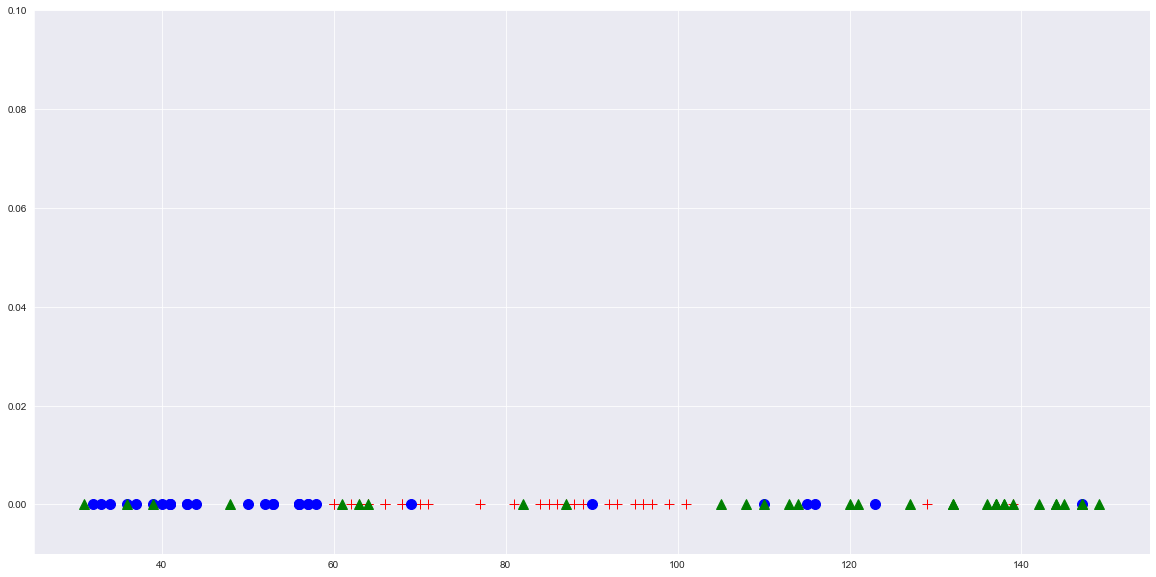

In [6]:
x_0 = x_class[y_class_noisy==0]
x_1 = x_class[y_class_noisy==1]
x_2 = x_class[y_class_noisy==2]
plt.figure(figsize=(20,10))
plt.plot(x_0, np.zeros_like(x_0), "r+", markersize=10)
plt.plot(x_1, np.zeros_like(x_1), "bo", markersize=10)
plt.plot(x_2, np.zeros_like(x_2), "g^", markersize=10)
plt.ylim(-0.01,.1)
plt.show()

<img src="images/classification.png" alt="classification" width="400" height="400">

<h2>Examples of Classification Problems</h2>

<h3>1. Spam Email Classification</h3>

<img src="images/spam_email.png" alt="spam email" width="400" height="400">

<h3>2. E-Commerce Comments Sentiment Analysis</h3>

<img src="images/comment_sentiment_analysis.jpg" alt="comment sentiment analysis" width="400" height="400">

<h3>3. Covid Detection Using X-Rays</h3>

<img src="images/covid_detection.jpeg" alt="covid detection" width="400" height="400">

<h2>Salmon Vs Sea Bass</h2>

A fish packing plant wants to automate
the process of sorting incoming Fish on a
conveyor according to species using optical sensing

<img src="images/seabass_vs_salmon.png" alt="salmon vs seabass" width="400" height="400">

We set up a camera and take some
sample images to extract features that
could help us to distinguish between the
two species of fish like:
1. Lenght
2. Lightness

we gathered a dataset as follows:

In [27]:
dataset = pd.read_csv("salmon_vs_seabass.csv")
dataset.head()

,length,lightness,category
0,31,1909,1
1,51,1972,1
2,34,1780,0
3,29,1606,0
4,48,1669,0


In [41]:
salmon = dataset.loc[dataset["category"] == 0][["length","lightness"]].values
seabass = dataset.loc[dataset["category"] == 1][["length","lightness"]].values

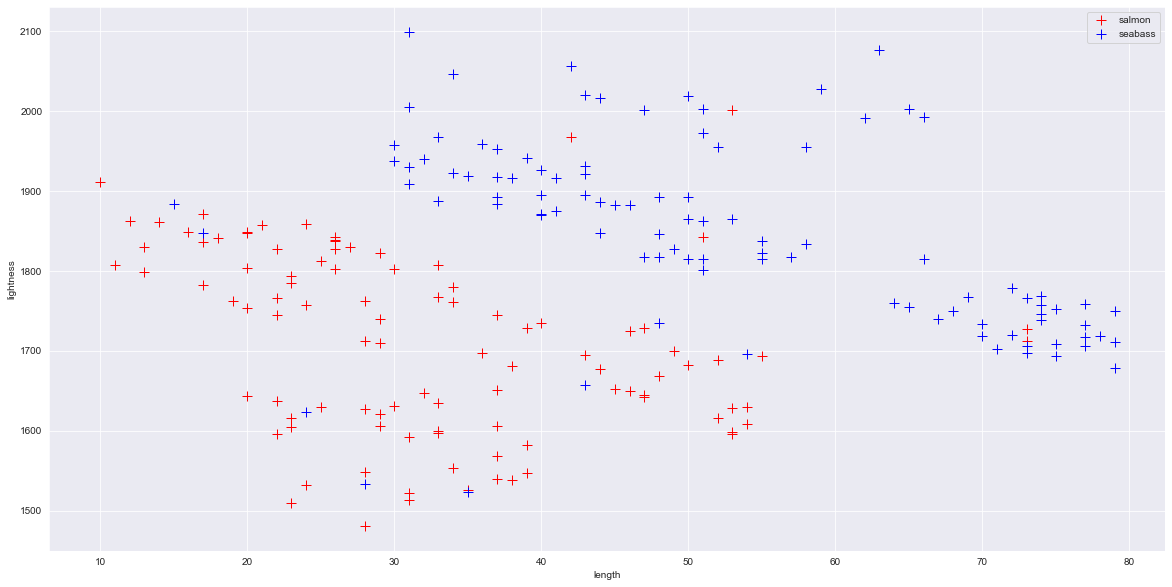

In [43]:
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="salmon")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="seabass")
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

Based on visualization it seems we can use a linear seperator to decide whether the data belongs to Salmon or Seabass category

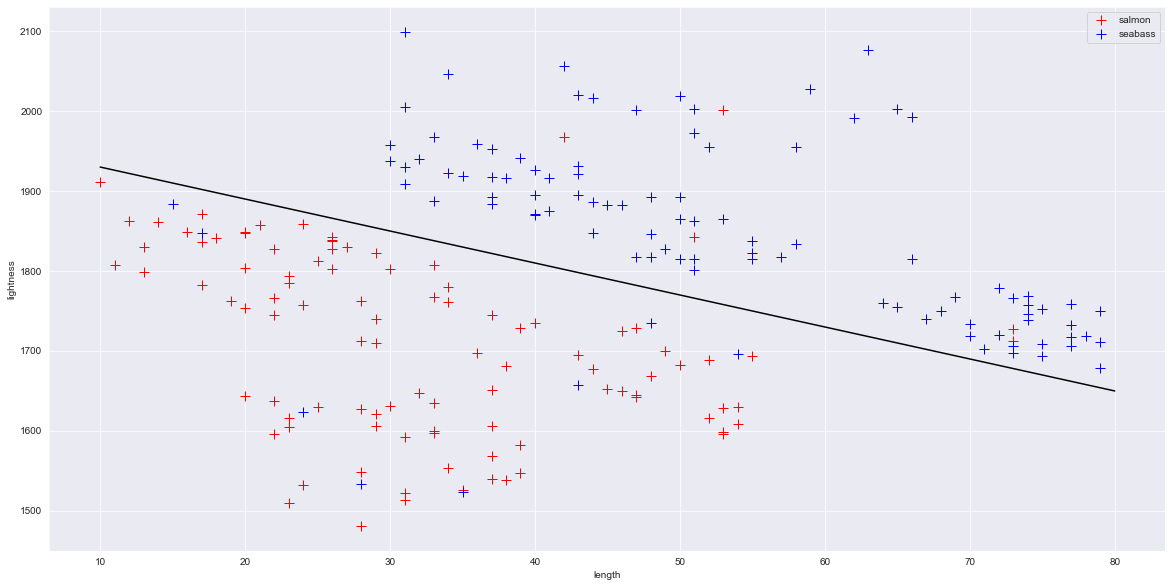

In [60]:
x_plot = np.linspace(10, 80, 1000).reshape(-1,1)
y_plot = -4 * x_plot + 1970
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="salmon")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="seabass")
plt.plot(x_plot, y_plot,"k")
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

<h3>But how the model works?</h3>

1. A sample datapoint goes into the model

<img src="images/classifier_pipeline.png" alt="salmon vs seabass" width="400" height="400">

2. A linaer Function is Computed for the data:
$$
y_{linear} = w_1x_1 + w_2x_2 + w_3
$$

3. A non-linear funciton (threshold) is computed for linearity output
$$
y_{pred} = f(y_{linear})
$$

<img src="images/classifier_blocks.png" alt="salmon vs seabass" width="400" height="400">

however the **Hard Thresholding Function** is not appropriate for gradient-base optimization techniques so it is better to use a smooth function: